### Decision Tree Exercises

Use the ```titanic``` data. In your classification-exercises repository create a notebook model.ipynb where you will do the following:

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
#python files imports
import acquire
import prepare

*Acquire and prepare the data for the modeling*

In [4]:
#load titanic db
titanic = acquire.get_titanic_data()

In [5]:
titanic.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


In [6]:
#prepare df: split in train, validate, test data sets and separate target columns from the data sets
train, validate, test = prepare.prep_titanic_3(titanic)

In [7]:
y_train = train.survived
y_validate = validate.survived
y_test = test.survived

train.drop(columns = ['survived', 'sex', 'class', 'embark_town'], inplace = True)
validate.drop(columns = ['survived', 'sex', 'class', 'embark_town'], inplace = True)
test.drop(columns = ['survived', 'sex', 'class', 'embark_town'], inplace = True)

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [9]:
train['baseline'] = train.survived.value_counts().idxmax() #baseline prediction is survived = 0

In [11]:
(train.survived == train.baseline).mean() #0.616

0.6164658634538153

In [12]:
train.drop(columns = 'baseline', inplace = True)

*Class colution for the baseline model evaluation*

In [9]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 3)}")

Baseline accuracy: 0.616


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
#create a tree algorithm
tree = DecisionTreeClassifier(max_depth = 5)

#model: fit the data into the tree
tree.fit(train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
predictions = tree.predict(train)
actual = y_train

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

*As it is a past data we'll use accuracy score for the evaluation*

In [17]:
confusion_matrix(actual, predictions) 

array([[252,  55],
       [ 22, 169]])

In [18]:
tree.score(train, y_train)

0.8453815261044176

In [33]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       307
           1       0.90      0.79      0.84       191

    accuracy                           0.89       498
   macro avg       0.89      0.87      0.88       498
weighted avg       0.89      0.89      0.89       498



In [19]:
#validation set
predictions_valid = tree.predict(validate)

In [20]:
confusion_matrix(y_validate, predictions_valid)

array([[107,  25],
       [ 12,  70]])

In [21]:
print(classification_report(y_validate, predictions_valid))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       132
           1       0.74      0.85      0.79        82

    accuracy                           0.83       214
   macro avg       0.82      0.83      0.82       214
weighted avg       0.84      0.83      0.83       214



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [15]:
#class solution

TN, FP, FN, TP = confusion_matrix(actual, predictions).ravel()

In [16]:
TN, FP, FN, TP

(252, 55, 22, 169)

In [22]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


*Sklearn is calling survival (1) our positive case*

In [23]:

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8453815261044176 

True Positive Rate/Sensitivity/Recall/Power: 0.8848167539267016 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1791530944625407 

True Negative Rate/Specificity/Selectivity: 0.8208469055374593 

False Negative Rate/Miss Rate: 0.11518324607329843 

Precision/PPV: 0.7544642857142857 

F1 Score: 0.8144578313253011 

Support (0): 307 

Support (1): 191


5. Run through steps 2-4 using a different max_depth value.

In [39]:
tree1 = DecisionTreeClassifier(max_depth = 4)
tree1.fit(train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
pred_train = tree1.predict(train)
confusion_matrix(y_train, pred_train)

array([[273,  34],
       [ 33, 158]])

In [44]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       307
           1       0.82      0.83      0.83       191

    accuracy                           0.87       498
   macro avg       0.86      0.86      0.86       498
weighted avg       0.87      0.87      0.87       498



In [46]:
pred_valid = tree1.predict(validate)
confusion_matrix(y_validate, pred_valid)

array([[108,  24],
       [ 24,  58]])

In [47]:
print(classification_report(y_validate, pred_valid))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       132
           1       0.71      0.71      0.71        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



In [48]:
#test set
pred_test = tree1.predict(test)
confusion_matrix(y_test, pred_test)

array([[87, 23],
       [23, 46]])

In [49]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       110
           1       0.67      0.67      0.67        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



- *Building models using **for** loop --- Class solution*

In [24]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.800633    0.703297   0.76506    0.751965      0.763301
recall       0.824104    0.670157   0.76506    0.747131      0.765060
f1-score     0.812199    0.686327   0.76506    0.749263      0.763923
support    307.000000  191.000000   0.76506  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.736453    0.913043  0.769076    0.824748      0.804182
recall       0.973941    0.439791  0.769076    0.706866      0.769076
f1-score     0.838710    0.593640  0.769076    0.716175      0.744717
support    307.000000  191.000000  0.769076  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.825153    0.779070  0.809237    0.802112      0.807479
recall       0.876221    0.701571  0.809237    0.788896      0.809237
f1-score     

6. Which model performs better on your in-sample data?

In [25]:
#max_depth 5 in my code and max_depth 15+ in class solutions

7. Which model performs best on your out-of-sample data, the validate set?

In [26]:
#class solution
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(train, y_train)
    
    out_of_sample_accuracy = tree.score(validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.765060,0.836449,-0.071388
1,2,0.769076,0.803738,-0.034662
2,3,0.809237,0.859813,-0.050576
3,4,0.825301,0.827103,-0.001802
4,5,0.845382,0.813084,0.032297
5,6,0.871486,0.831776,0.039710
6,7,0.875502,0.827103,0.048399
7,8,0.895582,0.850467,0.045115
8,9,0.905622,0.845794,0.059828
9,10,0.923695,0.850467,0.073227


*Visualize predictions*

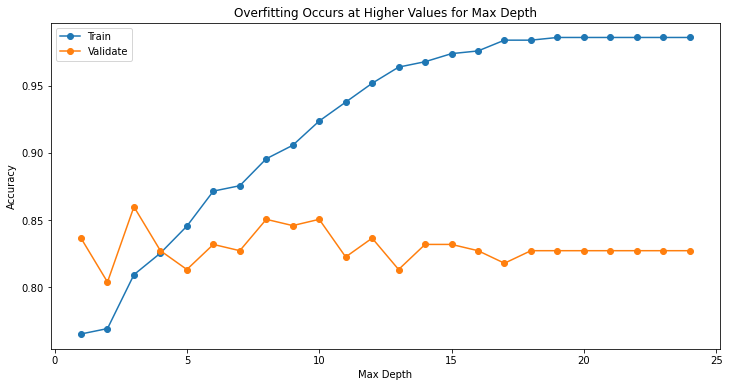

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### TELCO

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
#python files imports
import acquire
import prepare

1. Work through these same exercises using the Telco dataset.
2. Experiment with this model on other datasets with a higher number of output classes.

In [4]:
### load telco data
telco = acquire.get_telco_data()

In [5]:
telco.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check


In [5]:
#prepare & split into 3 sets
train, validate, test = prepare.prep_telco_data(telco)

In [7]:
#prepare model ready data sets and target series

y_train = train.churn_encoded
y_validate = validate.churn_encoded
y_test = test.churn_encoded

X_train = train.drop(columns = ['churn', 'churn_encoded'])
X_validate = validate.drop(columns = ['churn', 'churn_encoded'])
X_test = test.drop(columns = ['churn', 'churn_encoded'])

In [35]:
#create a decision tree
tree = DecisionTreeClassifier(max_depth = 5)

#model: fit the data into the tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
predictions = tree.predict(X_train)

In [37]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.70      0.45      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



In [21]:
y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [28]:
telco_baseline = (y_train == y_train.value_counts().idxmax()).mean()

In [29]:
print(f'Baseline accuracy: {telco_baseline:<15}')
print(f'Test accuracy: {tree.score(X_train, y_train):<15}')

Baseline accuracy: 0.7343154686309372
Test accuracy: 0.8041656083312166


In [31]:
#positive - churned
#fp we predicted churned but customer didn't
#fn we predicted customer won't churn but customer did churn

# we don't won't FP --> check precision score
import sklearn.metrics as skm
skm.precision_score(y_train, predictions)

0.7049180327868853

In [46]:
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = abs(df.train_accuracy - df.validate_accuracy)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.792228,0.793839,0.001611
2,3,0.792228,0.793839,0.001611
3,4,0.795784,0.796801,0.001017
4,5,0.804166,0.797393,0.006772
5,6,0.809500,0.796801,0.012699
6,7,0.826518,0.783768,0.042750
7,8,0.841758,0.770142,0.071616
8,9,0.863348,0.763626,0.099722
9,10,0.885192,0.766588,0.118604


In [48]:
#test sample
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.50      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.72      0.72      1407



Iris db

In [49]:
iris = acquire.get_iris_data()

In [50]:
iris = prepare.prep_iris(iris)

In [64]:
train, validate, test = prepare.split_db(iris, 'species')

In [65]:
validate.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
104,6.5,3.0,5.8,2.2,virginica,0,1


In [60]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'versicolor', 'virginica'],
      dtype='object')

In [66]:
y_train = train.species
y_validate = validate['species']
y_test = test.species

X_train = train.drop(columns = ['species', 'versicolor', 'virginica'])
X_validate = validate.drop(columns = ['species', 'versicolor', 'virginica'])
X_test = test.drop(columns = ['species', 'versicolor', 'virginica'])

In [67]:
tree = DecisionTreeClassifier(max_depth=2)

In [68]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [69]:
tree.score(X_train, y_train)

0.9523809523809523

In [70]:
predict = tree.predict(X_train)

In [71]:
print(classification_report(y_train, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.93      0.93        28
   virginica       0.93      0.93      0.93        28

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

